Data Mining-Bil 366 Final Ödevi
    
Tevfik Gürhan Kuraş-19120205062
Yusuf Serdar Yazıcıoğlu-19120205022
Orhan Gökberk Ünal-19120205041


Konu: Türkiye'deki şehirlerin popülasyonunun Covid-19 döneminde toplu taşıma istasyonlarına gidişlerdeki etkisi

# Giriş

TODO

Aşağıda 2020-2021 Google'ın sağladığı Türkiye Covid-19 Mobility datası bulunmaktadır.

In [1]:
import pandas as pd


#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

url = 'https://drive.google.com/file/d/1jowJRBc60-SioTWvEgNUv8FxEF8juOk8/view?usp=sharing'
generalurl2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df20 = pd.read_csv(url2020)
df20.info()

general_df20 = pd.read_csv(generalurl2020)
general_df20.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

Aşağıda 2020-2021  yılındaki mobility datasını aylara göre grupladık ve datanın ortalamasını aldık.

In [2]:
df20.index = pd.to_datetime(df20['date'],format='%Y-%m-%d')
mean_df20=df20.groupby([df20.index.month]).mean()
df21.index = pd.to_datetime(df21['date'],format='%Y-%m-%d')
mean_df21=df21.groupby([df21.index.month]).mean()

Aşağıda TÜİK'in sunduğu Türkiye'nin nüfus bilgileri bulunmaktadır. 

In [3]:
#https://data.tuik.gov.tr/Bulten/Index?p=Adrese-Dayali-Nufus-Kayit-Sistemi-Sonuclari-2020-37210
url = 'https://drive.google.com/file/d/1UKaXY9ynV2v4kvVGnQpF7s0tqgwhYup1/view?usp=sharing'
tr_population_data_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

tr_population_data=pd.read_csv(tr_population_data_url)

tr_population_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        81 non-null     object
 1   population  81 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


Aşağıda 2020 yılı mobility datasındaki market ve eczaneye gidişlerin aya göre değişiminin grafiği bulunmaktadır.

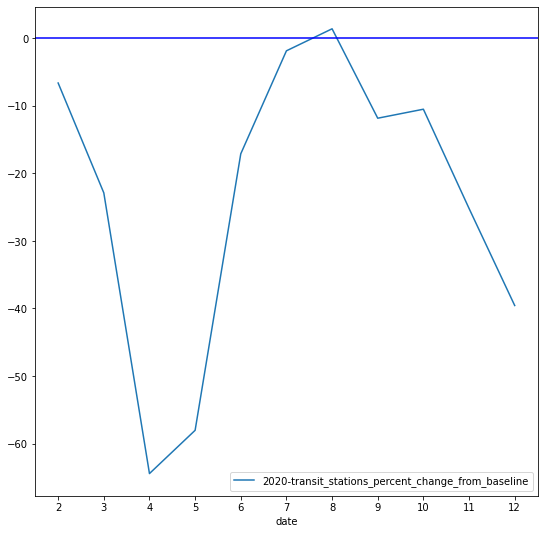

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


col_name = "transit_stations_percent_change_from_baseline"

plt.xticks( np.arange(1, 12 + 1) ) # 12 ay olarak göstermek için

mean_df20[col_name].plot( figsize=(9, 9) \
                         , y=df20[col_name] \
                         , legend=True \
                         , label = "2020-" + col_name)

#mean_df21[col_name].plot(figsize=(9, 9) \
#                         , y=df21[col_name] \
#                         , legend=True \
#                         , label = "2021-" + col_name)

plt.axhline(0, color='blue')

Nufüs datası grafik

<AxesSubplot:xlabel='il plaka kodu', ylabel='popülasyon'>

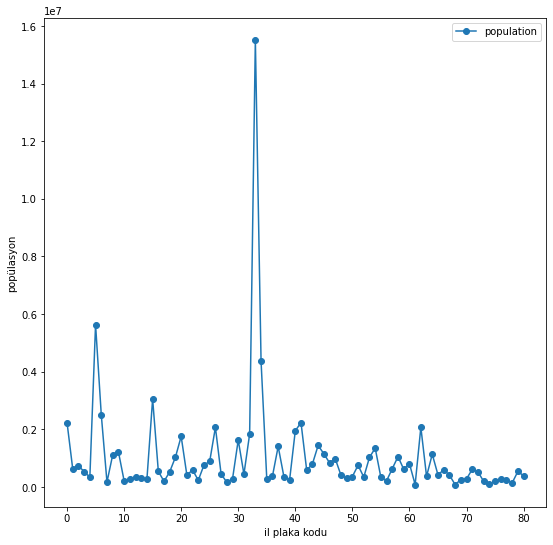

In [35]:
tr_population_data.plot( figsize=(9, 9) \
                         , marker='o'\
                         , legend=True \
                         , label = "2020-" + col_name, xlabel = "il plaka kodu", ylabel = "popülasyon")


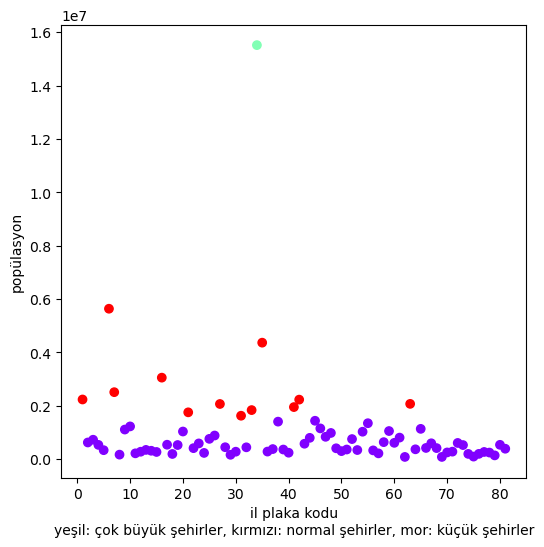

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# kmeans için datayı hazırlıyoruz
tr_population=tr_population_data.copy()
tr_population=tr_population["population"].values
tr_population=np.reshape(tr_population, (-1, 1)) 

# kmeans algoritmasını uyguluyoruz ve kümeliyoruz
kmeans = KMeans(3)
kmeans.fit(tr_population)
clusters = kmeans.fit_predict(tr_population)

# grafiğin güzel gözükmesi için birkaç ayar
plt.figure(figsize=(6, 6), dpi=100)

plt.scatter(np.arange(1, 81 + 1), tr_population_data['population'], c=clusters, cmap='rainbow')

plt.xlabel("il plaka kodu\nyeşil: çok büyük şehirler, kırmızı: normal şehirler, mor: küçük şehirler")
plt.ylabel("popülasyon")

# grafiği gösteriyoruz
plt.show()


### Büyük şehirler için analiz

### Normal şehirler için analiz

### Küçük şehirler için analiz

###  